# EDA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/wsl/avg_scores_all_years.csv', index_col=0)
df.head()

,year,event,round,heat,name,top_two_waves_total
0,2008,Quiksilver Pro Gold Coast,Round 2,Heat 1,Andy Irons,16.37
1,2008,Quiksilver Pro Gold Coast,Round 2,Heat 1,Tamaroa McComb,5.90
2,2008,Quiksilver Pro Gold Coast,Round 2,Heat 2,Julian Wilson,14.00
3,2008,Quiksilver Pro Gold Coast,Round 2,Heat 2,Pancho Sullivan,13.23
4,2008,Quiksilver Pro Gold Coast,Round 2,Heat 3,Jeremy Flores,10.83


In [4]:
df['event'].unique()

array(['Quiksilver Pro Gold Coast', 'Rip Curl Pro Bells Beach',
       'Billabong Pro Teahupoo', 'Globe Pro Fiji', 'Billabong Pro J-Bay',
       'Rip Curl Pro Search Bali', 'Boost Mobile Pro',
       'Quiksilver Pro France', 'Billabong Pro Mundaka',
       'Hang Loose Santa Catarina Pro', 'Billabong Pipeline Masters',
       'Hurley Pro Trestles', 'Rip Curl Search', 'Santa Catarina Pro',
       'Rip Curl Pro Portugal', 'Billabong Pipe Masters',
       'Billabong Rio Pro', 'Quiksilver Pro New York', 'Volcom Fiji Pro',
       "O'Neill Coldwater Classic Santa Cruz", 'Oakley Pro Bali',
       'Drug Aware Margaret River Pro', 'Fiji Pro', 'J-Bay Open',
       'Billabong Pro Tahiti', 'Hurley Pro at Trestles',
       'Moche Rip Curl Pro Portugal', 'Oi Rio Pro',
       'MEO Rip Curl Pro Portugal', 'Outerknown Fiji Pro',
       'Corona Open J-Bay', 'Corona Bali Protected',
       'Uluwatu CT Margaret River Pro', "Tahiti Pro Teahupo'o",
       'Margaret River Pro',
       'Billabong Pipe Masters 

In [5]:
pipe = [
    "Billabong Pipe Masters presented by Hydro Flask",
    "Billabong Pro Pipeline",
    "Billabong Pipe Masters presented by Hydro Flask",
    "Billabong Pipe Masters",
    "Billabong Pipeline Masters"
]

df.loc[df['event'].isin(pipe)].shape

(1649, 6)

In [6]:
df_pipe = df.loc[df['event'].isin(pipe)].reindex()


In [7]:
df['event'].value_counts()[0]

1473

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16035 entries, 0 to 109
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 16035 non-null  int64  
 1   event                16035 non-null  object 
 2   round                16035 non-null  object 
 3   heat                 16035 non-null  object 
 4   name                 16035 non-null  object 
 5   top_two_waves_total  16035 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 876.9+ KB


In [9]:
df['year'] = df['year'].astype(str)

In [10]:
df.groupby(by=['event', 'round', 'heat']).mean()

top_two_waves_total
event                  round             heat                                    
Billabong Pipe Masters Elimination Round Heat 1 Watch replay             8.286667
                                         Heat 2 Watch replay             7.596667
                                         Heat 3 Watch replay             7.146667
                                         Heat 4 Watch replay            10.013333
                       Final             Heat 1                         12.912000
...                                                                           ...
Volcom Fiji Pro        Round 5           Heat 2                         15.057500
                                         Heat 3                         13.355000
                                         Heat 4                         14.235000
                       Semifinal         Heat 1                         13.167500
                                         Heat 2                         16.692500

[3284 rows x 1 columns]

In [11]:
df['round'].unique()

array(['Round 2', 'Round 1', 'Round 3', 'Round 4', 'Quarterfinal',
       'Semifinal', 'Final', 'Round 5', 'Quarterfinals', 'Semifinals',
       'Trials Quarterfinals', 'Trials Round 1', 'Trials Semifinals',
       'Trials Final', 'Elimination Round', 'Seeding Round',
       'Round of 32', 'Round of 16', 'Opening Round'], dtype=object)

In [12]:
df["round"] = df["round"].map(
    {
        "Seeding Round": "Round 1",
        "Round of 32": "Round 3",
        "Quarterfinal": "Quarterfinals",
        "Round of 16": "Round 4",
        "Elimination Round": "Round 2",
        "Opening Round": "Round 1",
        "Round 1": "Round 1",
        "Round 2": "Round 2",
        "Round 3": "Round 3",
        "Round 4": "Round 4",
        "Round 5": "Round 5",
        "Quarterfinals": "Quarterfinals",
        "Final": "Final",
        "Semifinal": "Semifinals",
        "Semifinals": "Semifinals",
        "Trials Quarterfinals": "Trials Quarterfinals",
        "Trials Round 1": "Trials Round 1",
        "Trials Semifinals": "Trials Semifinals",
        "Trials Final": "Trials Final",
    }
)


In [13]:
df.groupby(by=['event', 'round', 'heat']).mean().head()

top_two_waves_total
event                  round         heat                                    
Billabong Pipe Masters Final         Heat 1                            12.912
                                     Heat 1 Watch replay               11.723
                       Quarterfinals Heat 1                            10.336
                                     Heat 1 Watch replay               10.117
                                     Heat 2                            11.254

In [14]:
df['heat'].unique()

array(['Heat 1 ', 'Heat 2 ', 'Heat 3 ', 'Heat 4 ', 'Heat 5 ', 'Heat 6 ',
       'Heat 7 ', 'Heat 8 ', 'Heat 9 ', 'Heat 10 ', 'Heat 11 ',
       'Heat 12 ', 'Heat 13 ', 'Heat 14 ', 'Heat 15 ', 'Heat 16 ',
       'Heat 8 Watch replay', 'Heat 6 Watch replay',
       'Heat 2 Watch replay', 'Heat 1 Watch replay',
       'Heat 4 Watch replay', 'Heat 10 Watch replay',
       'Heat 11 Watch replay', 'Heat 12 Watch replay',
       'Heat 3 Watch replay', 'Heat 5 Watch replay',
       'Heat 7 Watch replay', 'Heat 9 Watch replay',
       'Heat 13 Watch replay', 'Heat 14 Watch replay',
       'Heat 15 Watch replay', 'Heat 16 Watch replay'], dtype=object)

In [15]:
df["heat"] = df["heat"].map(
    {
        "Heat 1 ": "Heat 1",
        "Heat 2 ": "Heat 2",
        "Heat 3 ": "Heat 3",
        "Heat 4 ": "Heat 4",
        "Heat 5 ": "Heat 5",
        "Heat 6 ": "Heat 6",
        "Heat 7 ": "Heat 7",
        "Heat 8 ": "Heat 8",
        "Heat 9 ": "Heat 9",
        "Heat 10 ": "Heat 10",
        "Heat 11 ": "Heat 11",
        "Heat 12 ": "Heat 12",
        "Heat 13 ": "Heat 13",
        "Heat 14 ": "Heat 14",
        "Heat 15 ": "Heat 15",
        "Heat 16 ": "Heat 16",
        "Heat 8 Watch replay": "Heat 8",
        "Heat 6 Watch replay": "Heat 6",
        "Heat 2 Watch replay": "Heat 2",
        "Heat 1 Watch replay": "Heat 1",
        "Heat 4 Watch replay": "Heat 4",
        "Heat 10 Watch replay": "Heat 10",
        "Heat 11 Watch replay": "Heat 11",
        "Heat 12 Watch replay": "Heat 12",
        "Heat 3 Watch replay": "Heat 3",
        "Heat 5 Watch replay": "Heat 5",
        "Heat 7 Watch replay": "Heat 7",
        "Heat 9 Watch replay": "Heat 9",
        "Heat 13 Watch replay": "Heat 13",
        "Heat 14 Watch replay": "Heat 14",
        "Heat 15 Watch replay": "Heat 15",
        "Heat 16 Watch replay": "Heat 16",
    }
)


In [16]:
df['top_two_waves_total'].mean()

11.593201746180238

<AxesSubplot:xlabel='year,event,round,heat'>

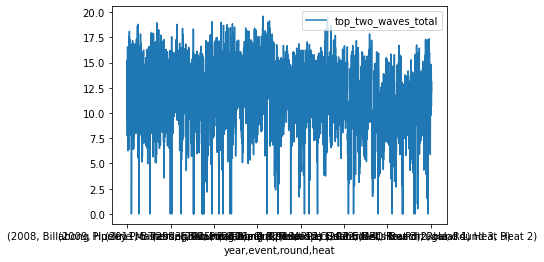

In [17]:
df.groupby(by=['year', 'event', 'round', 'heat']).mean().plot()

In [18]:
df.describe()

,top_two_waves_total
count,16035.000000
mean,11.593202
std,3.710494
min,0.000000
25%,9.370000
50%,12.000000
75%,14.230000
max,20.000000
